In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy

: 

In [4]:
print(os.listdir(r"C:\Users\Prerana Zope\Desktop\dataset"))


['test', 'train']


In [5]:
#Start by creating empty lists.
train_images = []
train_labels = [] 

In [6]:
for directory_path in glob.glob(r"C:\Users\Prerana Zope\Desktop/dataset/train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path,0) #Reading color images
        img = cv2.resize(img, (200, 200)) #Resize images
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        train_images.append(img)
        train_labels.append(label)

Neg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (10).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1000).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1001).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1002).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1003).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1004).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1005).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1006).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1007).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1008).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1009).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1010).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1011).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1012).jpg
C:\Users\Prerana Zope\Desktop/dataset/train\Neg\1 (1013).jpg
C:\Users\Prerana Zope\Des

In [7]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [8]:
print(train_images)
print(train_labels)

[[[ 72  71  68 ...  93  90  85]
  [ 77  75  71 ...  91  87  87]
  [ 85  79  74 ...  89  84  89]
  ...
  [ 72  72  73 ...  26  25  27]
  [ 61  78  74 ...  21  22  24]
  [ 40  74  70 ...  15  14  16]]

 [[133 131 134 ...  17  17  17]
  [141 138 140 ...  17  17  17]
  [148 145 146 ...  17  17  17]
  ...
  [212 231 242 ... 124 125 125]
  [213 233 246 ... 124 125 125]
  [217 237 250 ... 124 125 125]]

 [[219 221 224 ...  45  21  34]
  [218 221 224 ...  64  34  20]
  [218 221 224 ...  86  57  12]
  ...
  [111 120 100 ...  28  38  46]
  [ 49  60  58 ...  21  21  37]
  [ 43  60  73 ...  13   2  38]]

 ...

 [[159 158 158 ... 109 109 109]
  [162 161 161 ... 109 110 114]
  [169 167 165 ... 109 112 119]
  ...
  [ 65  71  77 ...  79  77  76]
  [ 69  74  81 ...  75  76  77]
  [ 75  76  78 ...  70  71  71]]

 [[ 86  75  64 ...  89 138 209]
  [ 87  81  69 ... 146 219 237]
  [ 81  85  78 ... 216 236 245]
  ...
  [ 42  47  49 ...  86  78  91]
  [ 45  47  48 ...  88  81  81]
  [ 47  45  45 ...  81  86  

In [9]:
#Do exactly the same for test/validation images
# test
test_images = []
test_labels = []

In [10]:
for directory_path in glob.glob(r"C:\Users\Prerana Zope\Desktop/dataset/test/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path,0)
        img = cv2.resize(img, (200, 200))
        test_images.append(img)
        test_labels.append(fruit_label)

In [11]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [12]:
print(test_images)
print(test_labels)

[[[230 231 233 ... 236 235 235]
  [231 232 233 ... 236 235 235]
  [232 232 233 ... 236 235 235]
  ...
  [229 229 229 ... 216 216 216]
  [228 228 228 ... 215 214 214]
  [226 226 226 ... 214 214 214]]

 [[191 191 192 ... 169 174 178]
  [192 192 193 ... 169 175 179]
  [194 194 195 ... 170 176 179]
  ...
  [199 200 200 ... 175 179 182]
  [199 199 200 ... 173 177 179]
  [199 199 200 ... 171 175 177]]

 [[192 191 192 ... 179 174 168]
  [194 194 195 ... 183 178 172]
  [197 198 199 ... 185 181 175]
  ...
  [206 207 208 ... 183 180 177]
  [205 206 207 ... 179 176 173]
  [204 205 206 ... 175 170 166]]

 ...

 [[183 183 183 ... 221 221 221]
  [185 185 185 ... 221 219 219]
  [182 182 182 ... 220 218 217]
  ...
  [ 90  90  90 ... 155 156 157]
  [ 90  90  90 ... 155 154 154]
  [ 90  90  90 ... 162 161 160]]

 [[ 91 111 128 ... 104 111 112]
  [ 85  95 110 ... 107 115 117]
  [ 79  82  90 ... 110 116 119]
  ...
  [ 73  69  86 ...  96  95  94]
  [ 70  77 102 ...  97  97  97]
  [ 70  87 118 ...  95  96  

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [14]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [21]:
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
       # print(image)
        #break
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image,:,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
  
                
         #Full image
        #GLCM = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = greycomatrix(img, [2], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2
       
        GLCM3 = greycomatrix(img, [5], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3
        
        


        GLCM4 = greycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        GLCM6= greycomatrix(img, [5], [0])       
        GLCM_Energy6 = greycoprops(GLCM6, 'energy')[0]
        df['Energy6'] = GLCM_Energy6
        GLCM_corr6 = greycoprops(GLCM6, 'correlation')[0]
        df['Corr6'] = GLCM_corr6       
        GLCM_diss6= greycoprops(GLCM6, 'dissimilarity')[0]
        df['Diss_sim6'] = GLCM_diss6       
        GLCM_hom6 = greycoprops(GLCM6, 'homogeneity')[0]
        df['Homogen6'] = GLCM_hom6       
        GLCM_contr6 = greycoprops(GLCM6, 'contrast')[0]
        df['Contrast6'] = GLCM_contr6
        
        GLCM7 = greycomatrix(img, [0], [3*np.pi/4])       
        GLCM_Energy7 = greycoprops(GLCM7, 'energy')[0]
        df['Energy7'] = GLCM_Energy7
        GLCM_corr7 = greycoprops(GLCM7, 'correlation')[0]
        df['Corr7'] = GLCM_corr7       
        GLCM_diss7 = greycoprops(GLCM7, 'dissimilarity')[0]
        df['Diss_sim7'] = GLCM_diss7      
        GLCM_hom7 = greycoprops(GLCM7, 'homogeneity')[0]
        df['Homogen7'] = GLCM_hom7       
        GLCM_contr7 = greycoprops(GLCM7, 'contrast')[0]
        df['Contrast7'] = GLCM_contr7
        
        GLCM8 = greycomatrix(img, [3], [np.pi/2])       
        GLCM_Energy8 = greycoprops(GLCM8, 'energy')[0]
        df['Energy8'] = GLCM_Energy8
        GLCM_corr8 = greycoprops(GLCM8, 'correlation')[0]
        df['Corr8'] = GLCM_corr8       
        GLCM_diss8 = greycoprops(GLCM8, 'dissimilarity')[0]
        df['Diss_sim8'] = GLCM_diss8      
        GLCM_hom8 = greycoprops(GLCM8, 'homogeneity')[0]
        df['Homogen8'] = GLCM_hom8       
        GLCM_contr8 = greycoprops(GLCM8, 'contrast')[0]
        df['Contrast8'] = GLCM_contr8
    
        
       

        
        #Add more filters as needed
        entropy = shannon_entropy(img)
        df['Entropy'] = entropy
        print(GLCM_Energy,GLCM_corr,GLCM_diss,GLCM_hom,GLCM_contr,entropy)

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset


In [22]:
image_features = feature_extractor(x_train)
X_for_ML =image_features

[0.01434438] [0.92285539] [11.36904523] [0.11186581] [297.2559799] 7.3229864900455155
[0.10587865] [0.99393033] [4.39145729] [0.46864458] [78.67135678] 7.108570751344935
[0.01673699] [0.96979813] [9.40123116] [0.18773067] [225.59761307] 7.581686549054396
[0.32485341] [0.96726445] [10.41987437] [0.543264] [644.5929397] 5.769036403416087
[0.02771556] [0.93779005] [4.47648241] [0.26774964] [100.15768844] 6.841432666158809
[0.0107295] [0.81039517] [22.12801508] [0.06141154] [1045.58615578] 7.487267206339041
[0.0090961] [0.81729082] [23.19889447] [0.06202288] [1178.64211055] 7.778597473257209
[0.01326766] [0.84769829] [20.2070603] [0.08584436] [912.52379397] 7.590532298113118
[0.01801348] [0.88035234] [15.09572864] [0.1117096] [592.11251256] 7.027204690712958
[0.0265344] [0.95114678] [12.63296482] [0.19396376] [560.01613065] 7.562277182191818
[0.2428293] [0.95661665] [13.72650754] [0.31715405] [613.15781407] 6.539545692355543
[0.01540006] [0.97049113] [8.29138191] [0.16750566] [174.99927136

KeyboardInterrupt: 

In [15]:
import lightgbm as lgb
 #Class names for LGBM start at 0 so reassigning labels from 1,2,3,4 to 0,1,2,3,4
d_train = lgb.Dataset(X_for_ML, label=y_train)

In [16]:
lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',    
              'objective':'multiclass',
              'metric': 'multi_logloss',
              'num_leaves':100,
              'max_depth':15,
              'num_class':2}  #no.of unique values in the target class not inclusive of the end value

In [17]:
lgb_model = lgb.train(lgbm_params, d_train, 100) #50 iterations. Increase iterations for small learning rates

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 6952, number of used features: 29
[LightGBM] [Info] Start training from score -0.856885
[LightGBM] [Info] Start training from score -0.552485


In [18]:
#lgb.plot_metric(lgb_model)

In [19]:
#lgb.plot_importance(lgb_model)

In [20]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test
test_prediction = lgb_model.predict(test_for_RF)
test_prediction=np.argmax(test_prediction, axis=1)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

In [21]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

Accuracy =  0.8766666666666667


In [22]:
print("Precision Score: ",metrics.precision_score(test_labels, test_prediction,average='macro'))
print("Recall Score: ",metrics.recall_score(test_labels, test_prediction,average='weighted'))
print("F1 Score: ",metrics.f1_score(test_labels, test_prediction,average='micro'))

Precision Score:  0.8788549327582784
Recall Score:  0.8766666666666667
F1 Score:  0.8766666666666667


<AxesSubplot:>

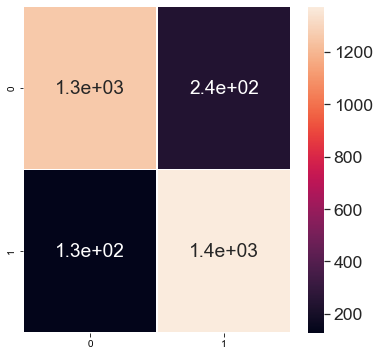

In [23]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

The prediction for this image is:  ['Pos']
The actual label for this image is:  Pos


C:\Users\PRERANA ZOPE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


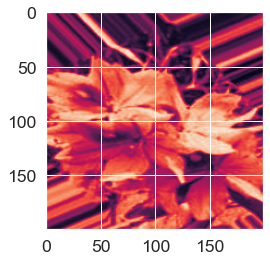

In [24]:
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = lgb_model.predict(input_img_for_RF)
img_prediction=np.argmax(img_prediction, axis=1)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

In [25]:
'''from sklearn import svm
SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification
SVM_model.fit(X_for_ML, y_train)'''


"from sklearn import svm\nSVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification\nSVM_model.fit(X_for_ML, y_train)"

In [26]:
'''test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_SVM = np.reshape(test_features, (x_test.shape[0], -1))'''

'test_features = feature_extractor(x_test)\ntest_features = np.expand_dims(test_features, axis=0)\ntest_for_SVM = np.reshape(test_features, (x_test.shape[0], -1))'